# Initialize Folders

In [1]:
from __future__ import print_function
from imutils import paths
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import keras

from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import backend as keras

from datetime import datetime

from UnetModel import *
#import skimage.io as io
#import skimage.transform as trans

#K.set_image_data_format("channels_last")

%matplotlib inline
%load_ext autoreload
%autoreload 2


Using TensorFlow backend.


In [2]:
img_rows = 256
img_cols = 256

#Training data generation
data_gen_args = dict(
#    samplewise_center = True,
#    samplewise_std_normalization = True,
    rotation_range=180,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

#Validation data generation
data_val_gen_args = dict(
    #samplewise_center = True,
    #samplewise_std_normalization = True
    )

#Create UNet Model
#model = FullUnetModel()
#model = UnetModel()
#model = BiggerLeakyUnetModelWithBatchnorm()
model = BiggerLeakyUnetModel()
#model = BiggerLeakyUnetModelWithLayernorm()
#model = BiggerLeakyUnetModelWithBatchLayernorm()

#Setup generator
batch_size = 2
      
myGene = trainGenerator(batch_size,'data/train','images','masks',data_gen_args, target_size= (img_rows,img_rows))
myValGene = validationGenerator(batch_size,'data/val','images','masks',data_val_gen_args, target_size= (img_rows,img_rows))

#Create folder for models
date_object = datetime.now()
# convert object to the format we want
formatted_date = date_object.strftime('%Y%m%d')
output_dir = 'unet/{}'.format(formatted_date)
os.makedirs(output_dir, exist_ok =True)

#Setup Checkpoint to only capture best estimate
model_checkpoint = ModelCheckpoint('{}/unet_lesion_{{epoch:03d}}-{{val_jaccard_coef:.5f}}.hdf5'.format(output_dir)
                                   , monitor='val_jaccard_coef'
                                   ,verbose=1, mode='max', save_best_only=True)


Instructions for updating:
Colocations handled automatically by placer.


c:\notebooks\MelanomaSegmentation\UnetModel.py:466: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=inputs, output=output)


In [3]:
iterations = 100
#Train
history = model.fit_generator(
    myGene,
    steps_per_epoch = 1000, 
    epochs=iterations,
    callbacks=[model_checkpoint],
    validation_data=myValGene,
    validation_steps=260)

model.save(os.path.join(output_dir, 'iter_{}'.format(iterations)))

Epoch 1/100
Found 519 images belonging to 1 classes.
Found 1555 images belonging to 1 classes.
Found 519 images belonging to 1 classes.
Found 1555 images belonging to 1 classes.
1000/1000 [==============================] - 646s 646ms/step - loss: -0.4407 - jaccard_coef: 0.4407 - val_loss: -0.6108 - val_jaccard_coef: 0.6108

Epoch 00001: val_jaccard_coef improved from -inf to 0.61076, saving model to unet/20190604/unet_lesion_001-0.61076.hdf5
Epoch 2/100
1000/1000 [==============================] - 602s 602ms/step - loss: -0.6277 - jaccard_coef: 0.6277 - val_loss: -0.6550 - val_jaccard_coef: 0.6550

Epoch 00002: val_jaccard_coef improved from 0.61076 to 0.65500, saving model to unet/20190604/unet_lesion_002-0.65500.hdf5
Epoch 3/100
1000/1000 [==============================] - 625s 625ms/step - loss: -0.6740 - jaccard_coef: 0.6740 - val_loss: -0.7054 - val_jaccard_coef: 0.7054

Epoch 00003: val_jaccard_coef improved from 0.65500 to 0.70543, saving model to unet/20190604/unet_lesion_003-0

1000/1000 [==============================] - 605s 605ms/step - loss: -0.7880 - jaccard_coef: 0.7880 - val_loss: -0.7882 - val_jaccard_coef: 0.7882

Epoch 00034: val_jaccard_coef did not improve from 0.79211
Epoch 35/100
1000/1000 [==============================] - 609s 609ms/step - loss: -0.7758 - jaccard_coef: 0.7758 - val_loss: -0.7864 - val_jaccard_coef: 0.7864

Epoch 00035: val_jaccard_coef did not improve from 0.79211
Epoch 36/100
1000/1000 [==============================] - 608s 608ms/step - loss: -0.7827 - jaccard_coef: 0.7827 - val_loss: -0.7527 - val_jaccard_coef: 0.7527

Epoch 00036: val_jaccard_coef did not improve from 0.79211
Epoch 37/100
1000/1000 [==============================] - 609s 609ms/step - loss: -0.7816 - jaccard_coef: 0.7816 - val_loss: -0.7889 - val_jaccard_coef: 0.7889

Epoch 00037: val_jaccard_coef did not improve from 0.79211
Epoch 38/100
1000/1000 [==============================] - 602s 602ms/step - loss: -0.7883 - jaccard_coef: 0.7883 - val_loss: -0.7826 

1000/1000 [==============================] - 599s 599ms/step - loss: -0.7997 - jaccard_coef: 0.7997 - val_loss: -0.8031 - val_jaccard_coef: 0.8031

Epoch 00070: val_jaccard_coef did not improve from 0.81227
Epoch 71/100
1000/1000 [==============================] - 613s 613ms/step - loss: -0.8036 - jaccard_coef: 0.8036 - val_loss: -0.7840 - val_jaccard_coef: 0.7840

Epoch 00071: val_jaccard_coef did not improve from 0.81227
Epoch 72/100
1000/1000 [==============================] - 604s 604ms/step - loss: -0.8063 - jaccard_coef: 0.8063 - val_loss: -0.7953 - val_jaccard_coef: 0.7953

Epoch 00072: val_jaccard_coef did not improve from 0.81227
Epoch 73/100
1000/1000 [==============================] - 607s 607ms/step - loss: -0.8041 - jaccard_coef: 0.8041 - val_loss: -0.8035 - val_jaccard_coef: 0.8035

Epoch 00073: val_jaccard_coef did not improve from 0.81227
Epoch 74/100
1000/1000 [==============================] - 610s 610ms/step - loss: -0.8067 - jaccard_coef: 0.8067 - val_loss: -0.7916 

In [5]:
print(history.history['val_loss'])

[-0.6107564931143226, -0.6550033069745079, -0.7054325568136223, -0.6999673182162706, -0.7454383031021883, -0.7205300679670823, -0.7329898985439907, -0.7610971838063587, -0.7455523654904669, -0.7345910252174804, -0.7326260376183283, -0.7521060301934823, -0.7670871179572419, -0.7735905288530223, -0.7749174477851919, -0.7619428813227799, -0.7499340695521297, -0.7375836102776445, -0.7655971304644509, -0.7550814713710656, -0.7189462371242299, -0.761362816872854, -0.7724368140417257, -0.7512356651828468, -0.7733120325959946, -0.7807955453620941, -0.7660198553334312, -0.7485913684257882, -0.7882773382930167, -0.7921121433405978, -0.7903701177796417, -0.7787803043404985, -0.78569804071691, -0.7881632311725433, -0.7864347313008556, -0.752671525356053, -0.7888938016859323, -0.7826370744461728, -0.7768764460247606, -0.7868089604699313, -0.769362132903009, -0.794146509902096, -0.7923121417877991, -0.7785985181843844, -0.7850517548462789, -0.7973314485797992, -0.8002006708427202, -0.769446841022986

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [ ]:
#Continue traing
#Use initial_epoch 

history2 = model.fit_generator(
    myGene,
    steps_per_epoch = 1000, 
    epochs=200,
    callbacks=[model_checkpoint,tensorBoard], 
    initial_epoch = 100,
    validation_data=myValGene,
    validation_steps=100)

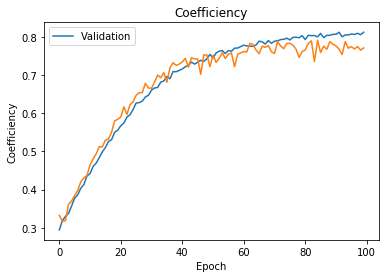

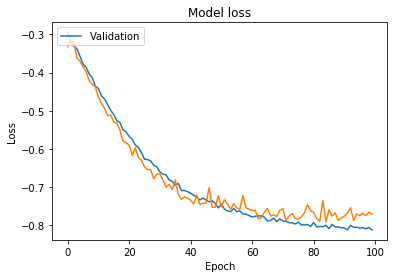

In [4]:
# Plot training & validation accuracy values
plt.plot(history.history['jaccard_coef'])
plt.plot(history.history['val_jaccard_coef'])
plt.title('Jaccard Index')
plt.ylabel('Jaccard Index')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [7]:
model.save('unet_lesion_20190520_batchnorm_100_epochs.hdf5')

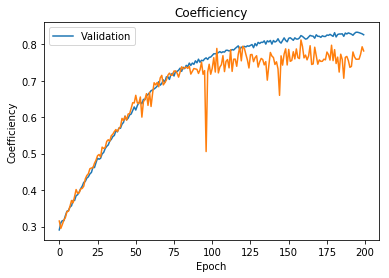

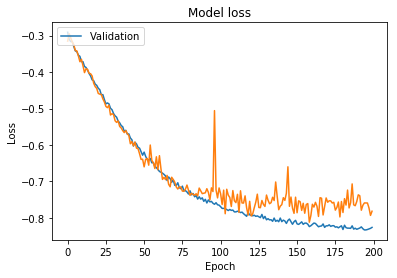

Training co-effiency    : 0.8329890729293876;
Validation co-effiency : 0.7589136445522309


In [8]:
#This code combined 2 seperate training history together and plot the result
hist = {}
for i in history.history.keys():
    hist_concate = np.array([np.array(history.history[i]), np.array(history2.history[i])]).flatten() 
    hist[i] = hist_concate
# Plot training & validation accuracy values
plt.plot(hist['jaccard_coef'])
plt.plot(hist['val_jaccard_coef'])
plt.title('Coefficiency')
plt.ylabel('Coefficiency')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

coef = np.array(hist['jaccard_coef'])
val_coef = np.array(hist['val_jaccard_coef'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))


In [5]:
coef = np.array(history.history['jaccard_coef'])
val_coef = np.array(history.history['val_jaccard_coef'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))


Training co-effiency    : 0.783300117247101;
Validation co-effiency : 0.7747246850145575


In [19]:
model.load_weights("unet_lesion_20190510_0.844.hdf5")

In [3]:
model.load_weights("unet/unet_lesion_20190509_0.82.hdf5")

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file.split('.')[0]+"_segmentation.png"), 
                        target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    #Preprocess image mask
    #img_mask = img_mask /255
    #img_mask[img_mask > 0.5] = 1
    #img_mask[img_mask <= 0.5] = 0
    #Preprocess images
    #mean = np.mean(img)  # mean for data centering
    #std = np.std(img)  # std for data normalization
    #img -= mean
    #img /= std
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    
    
    pred = model.predict([img])
    sess = tf.Session()
    score = sess.run(jaccard_coef(img_mask, pred))
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '_predict.jpg'))

with open("unet_test_result.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

C:\Users\li_ni\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


ISIC_0000006.jpg -- jaccard index: 0.8204335570335388
ISIC_0000012.jpg -- jaccard index: 0.895277202129364
ISIC_0000020.jpg -- jaccard index: 0.9368471503257751
ISIC_0000028.jpg -- jaccard index: 0.9540833234786987
ISIC_0000029.jpg -- jaccard index: 0.9710405468940735
ISIC_0000032.jpg -- jaccard index: 0.9379687309265137
ISIC_0000034.jpg -- jaccard index: 0.9610637426376343
ISIC_0000036.jpg -- jaccard index: 0.6328821182250977
ISIC_0000046.jpg -- jaccard index: 0.7106190323829651
ISIC_0000047.jpg -- jaccard index: 0.8271139860153198
ISIC_0000048.jpg -- jaccard index: 0.9203502535820007
ISIC_0000049.jpg -- jaccard index: 0.7685289978981018
ISIC_0000060.jpg -- jaccard index: 0.8884513974189758
ISIC_0000066.jpg -- jaccard index: 0.8258415460586548
ISIC_0000075.jpg -- jaccard index: 0.9624334573745728
ISIC_0000081.jpg -- jaccard index: 0.8980517387390137
ISIC_0000085.jpg -- jaccard index: 0.9038308262825012
ISIC_0000087.jpg -- jaccard index: 0.9354808330535889
ISIC_0000089.jpg -- jaccard i

ISIC_0009918.jpg -- jaccard index: 0.8337304592132568
ISIC_0009940.jpg -- jaccard index: 0.9321633577346802
ISIC_0009941.jpg -- jaccard index: 0.9281371235847473
ISIC_0009951.jpg -- jaccard index: 0.7013854384422302
ISIC_0009953.jpg -- jaccard index: 0.8924925327301025
ISIC_0009965.jpg -- jaccard index: 0.7939569354057312
ISIC_0009967.jpg -- jaccard index: 0.952351987361908
ISIC_0009987.jpg -- jaccard index: 0.8381227254867554
ISIC_0010010.jpg -- jaccard index: 0.862345814704895
ISIC_0010015.jpg -- jaccard index: 0.9470975995063782
ISIC_0010017.jpg -- jaccard index: 0.8119939565658569
ISIC_0010023.jpg -- jaccard index: 0.905510425567627
ISIC_0010024.jpg -- jaccard index: 0.2746669352054596
ISIC_0010025.jpg -- jaccard index: 0.9013641476631165
ISIC_0010028.jpg -- jaccard index: 0.9628216624259949
ISIC_0010056.jpg -- jaccard index: 0.9429064393043518
ISIC_0010067.jpg -- jaccard index: 0.7677852511405945
ISIC_0010069.jpg -- jaccard index: 0.9511911869049072
ISIC_0010070.jpg -- jaccard ind

ISIC_0013001.jpg -- jaccard index: 0.6437562108039856
ISIC_0013027.jpg -- jaccard index: 0.8202494382858276
ISIC_0013034.jpg -- jaccard index: 0.8060886263847351
ISIC_0013044.jpg -- jaccard index: 0.9411455392837524
ISIC_0013052.jpg -- jaccard index: 0.8860083222389221
ISIC_0013065.jpg -- jaccard index: 0.6433677673339844
ISIC_0013109.jpg -- jaccard index: 0.9316518306732178
ISIC_0013112.jpg -- jaccard index: 0.8344424366950989
ISIC_0013114.jpg -- jaccard index: 0.9318196773529053
ISIC_0013160.jpg -- jaccard index: 0.877713143825531
ISIC_0013167.jpg -- jaccard index: 0.9525981545448303
ISIC_0013178.jpg -- jaccard index: 0.6404279470443726
ISIC_0013189.jpg -- jaccard index: 0.595588743686676
ISIC_0013203.jpg -- jaccard index: 0.71566241979599
ISIC_0013216.jpg -- jaccard index: 0.932455837726593
ISIC_0013224.jpg -- jaccard index: 0.9210376143455505
ISIC_0013227.jpg -- jaccard index: 0.7265413403511047
ISIC_0013230.jpg -- jaccard index: 0.9456599354743958
ISIC_0013235.jpg -- jaccard index

ISIC_0015044.jpg -- jaccard index: 0.9443173408508301
ISIC_0015057.jpg -- jaccard index: 0.7822727560997009
ISIC_0015108.jpg -- jaccard index: 0.9098945260047913
ISIC_0015125.jpg -- jaccard index: 0.9568882584571838
ISIC_0015152.jpg -- jaccard index: 0.6207366585731506
ISIC_0015153.jpg -- jaccard index: 0.8815511465072632
ISIC_0015160.jpg -- jaccard index: 0.8988310098648071
ISIC_0015174.jpg -- jaccard index: 0.865166187286377
ISIC_0015190.jpg -- jaccard index: 0.9016358256340027
ISIC_0015193.jpg -- jaccard index: 0.9539282321929932
ISIC_0015207.jpg -- jaccard index: 0.6900749206542969
ISIC_0015208.jpg -- jaccard index: 0.9435019493103027
ISIC_0015211.jpg -- jaccard index: 0.6227360367774963
ISIC_0015212.jpg -- jaccard index: 0.9320597052574158
ISIC_0015215.jpg -- jaccard index: 0.8807101845741272
ISIC_0015223.jpg -- jaccard index: 0.959429919719696
ISIC_0015229.jpg -- jaccard index: 0.8354494571685791
ISIC_0015241.jpg -- jaccard index: 0.9012417793273926
ISIC_0015279.jpg -- jaccard in